In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:


deeponet_a = pd.read_csv('saved_deepOnetA/models/Mnist_LeNet/0615_005538/predictions/metric/metric.csv').values
deeponet_b = pd.read_csv('saved_deepOnetB/models/Mnist_LeNet/0615_005825/predictions/metric/metric.csv').values
deeponet_c = pd.read_csv('saved_deepOnetC/models/Mnist_LeNet/0615_003438/predictions/metric/metric.csv').values

print(deeponet_a.shape)

lstm_a = pd.read_csv('saved_lstmA/models/lstm/0615_041006/predictions/metric/metrics.csv').values
lstm_b = pd.read_csv('saved_lstmB/models/lstm/0615_070302/predictions/metric/metrics.csv').values
lstm_c = pd.read_csv('saved_lstmC/models/lstm/0615_061938/predictions/metric/metrics.csv').values


wrtds_a = pd.read_csv('wrtdsA_metric.csv').values
wrtds_b = pd.read_csv('wrtdsB_metric.csv').values
wrtds_c = pd.read_csv('wrtdsC_metric.csv').values


# deeponet_b = np.where(wrtds_b == np.nan, np.nan, deeponet_b)
# deeponet_c = np.where(wrtds_c == np.nan, np.nan, deeponet_c)
#lstm_a = np.where(wrtds_a == np.nan, np.nan, lstm_a)

deeponet_kge_index = [1, 4]
deeponet_pbias_index = [2, 5]
deeponet_r2_index = [3,6]

lstm_kge_index = [13, 28]
lstm_r2_index = [14, 29]
lstm_pbias_index = [15, 30]



# deeponet
deeponet_a_kge, deeponet_a_r2, deeponet_a_pbias = deeponet_a[:, deeponet_kge_index], deeponet_a[:, deeponet_r2_index], deeponet_a[:, deeponet_pbias_index]
deeponet_b_kge, deeponet_b_r2, deeponet_b_pbias = deeponet_b[:, deeponet_kge_index], deeponet_b[:, deeponet_r2_index], deeponet_b[:, deeponet_pbias_index]
deeponet_c_kge, deeponet_c_r2, deeponet_c_pbias = deeponet_c[:, deeponet_kge_index], deeponet_c[:, deeponet_r2_index], deeponet_c[:, deeponet_pbias_index]

# lstm 
lstm_a_kge, lstm_a_r2, lstm_a_pbias = lstm_a[:, [1, 4]], lstm_a[:, [3, 6]], lstm_a[:, [2, 5]]
lstm_b_kge, lstm_b_r2, lstm_b_pbias = lstm_b[:, [1, 4]], lstm_b[:, [3, 6]], lstm_b[:, [2, 5]]
lstm_c_kge, lstm_c_r2, lstm_c_pbias = lstm_c[:, [1, 4]], lstm_c[:, [3, 6]], lstm_c[:, [2, 5]]

# wrtds
wrtds_a_kge, wrtds_a_r2, wrtds_a_pbias = wrtds_a[:, lstm_kge_index], wrtds_a[:, lstm_r2_index], wrtds_a[:, lstm_pbias_index]
wrtds_b_kge, wrtds_b_r2, wrtds_b_pbias = wrtds_b[:, lstm_kge_index], wrtds_b[:, lstm_r2_index], wrtds_b[:, lstm_pbias_index]
wrtds_c_kge, wrtds_c_r2, wrtds_c_pbias = wrtds_c[:, lstm_kge_index], wrtds_c[:, lstm_r2_index], wrtds_c[:, lstm_pbias_index]


deeponet_a_kge, deeponet_a_r2, deeponet_a_pbias = np.where(wrtds_a_kge == np.nan, np.nan, deeponet_a_kge), np.where(wrtds_a_r2 == np.nan, np.nan, deeponet_a_r2), np.where(wrtds_a_pbias == np.nan, np.nan, deeponet_a_pbias)
deeponet_b_kge, deeponet_b_r2, deeponet_b_pbias = np.where(wrtds_b_kge == np.nan, np.nan, deeponet_b_kge), np.where(wrtds_b_r2 == np.nan, np.nan, deeponet_b_r2), np.where(wrtds_b_pbias == np.nan, np.nan, deeponet_b_pbias)
deeponet_c_kge, deeponet_c_r2, deeponet_c_pbias = np.where(wrtds_c_kge == np.nan, np.nan, deeponet_c_kge), np.where(wrtds_c_r2 == np.nan, np.nan, deeponet_c_r2), np.where(wrtds_c_pbias == np.nan, np.nan, deeponet_c_pbias)

lstm_a_kge, lstm_a_r2, lstm_a_pbias = np.where(wrtds_a_kge == np.nan, np.nan, lstm_a_kge), np.where(wrtds_a_r2 == np.nan, np.nan, lstm_a_r2), np.where(wrtds_a_pbias == np.nan, np.nan, lstm_a_pbias)
lstm_b_kge, lstm_b_r2, lstm_b_pbias = np.where(wrtds_b_kge == np.nan, np.nan, lstm_b_kge), np.where(wrtds_b_r2 == np.nan, np.nan, lstm_b_r2), np.where(wrtds_b_pbias == np.nan, np.nan, lstm_b_pbias)
lstm_c_kge, lstm_c_r2, lstm_c_pbias = np.where(wrtds_c_kge == np.nan, np.nan, lstm_c_kge), np.where(wrtds_c_r2 == np.nan, np.nan, lstm_c_r2), np.where(wrtds_c_pbias == np.nan, np.nan, lstm_c_pbias)


(482, 7)


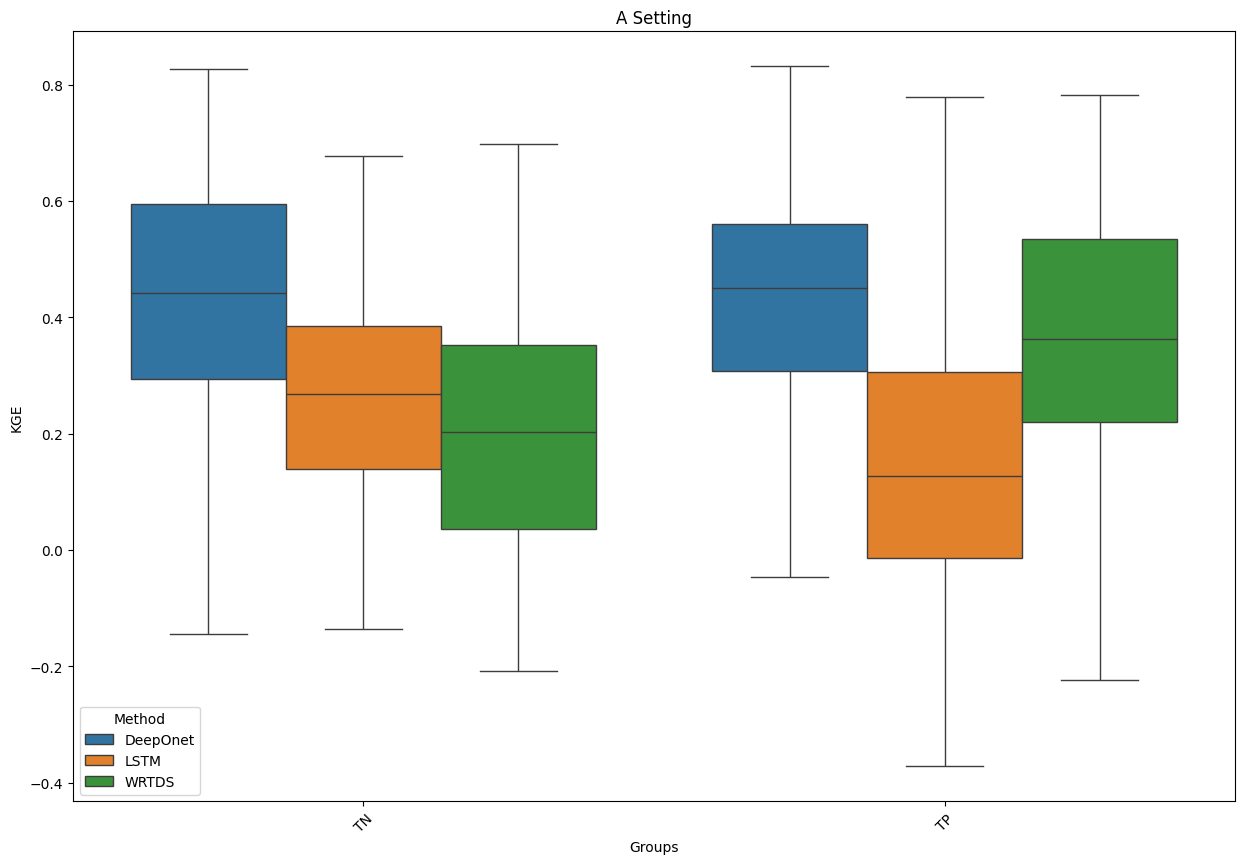

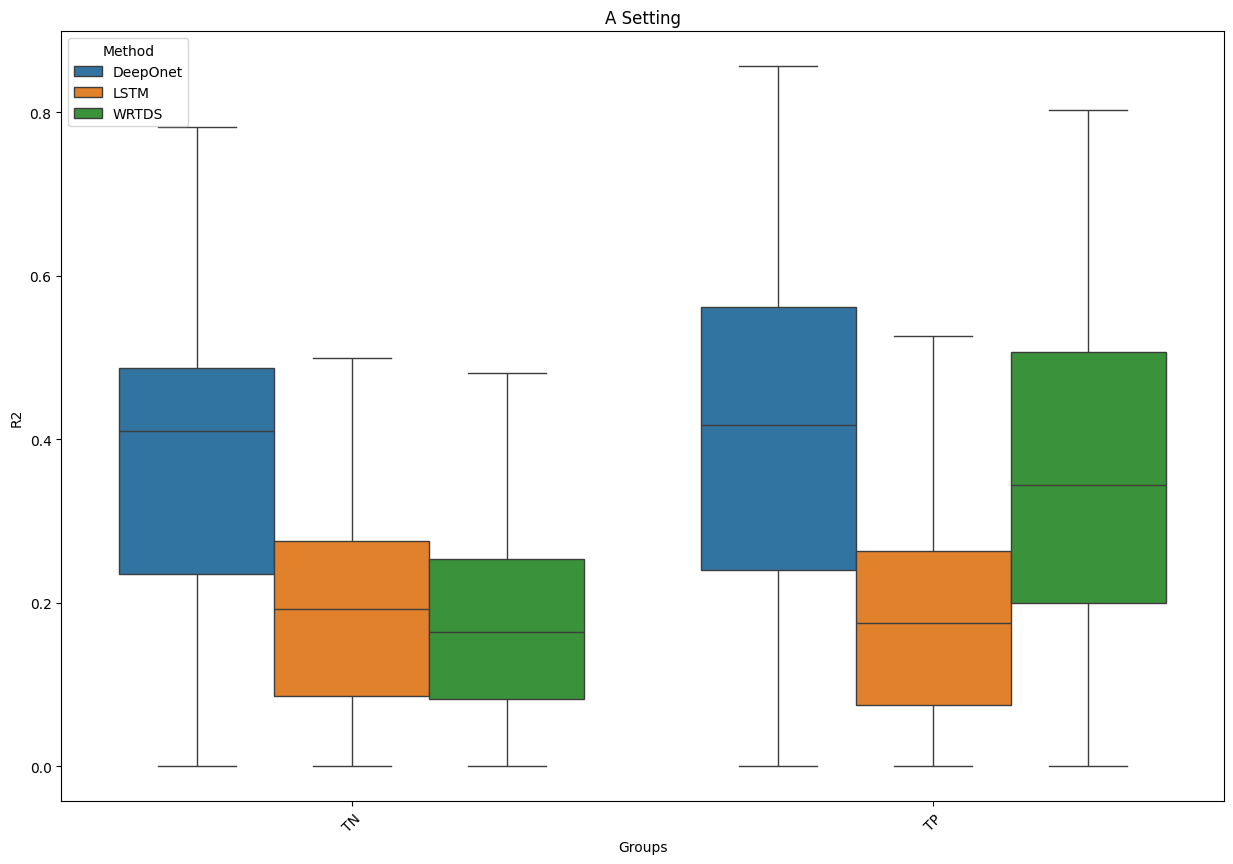

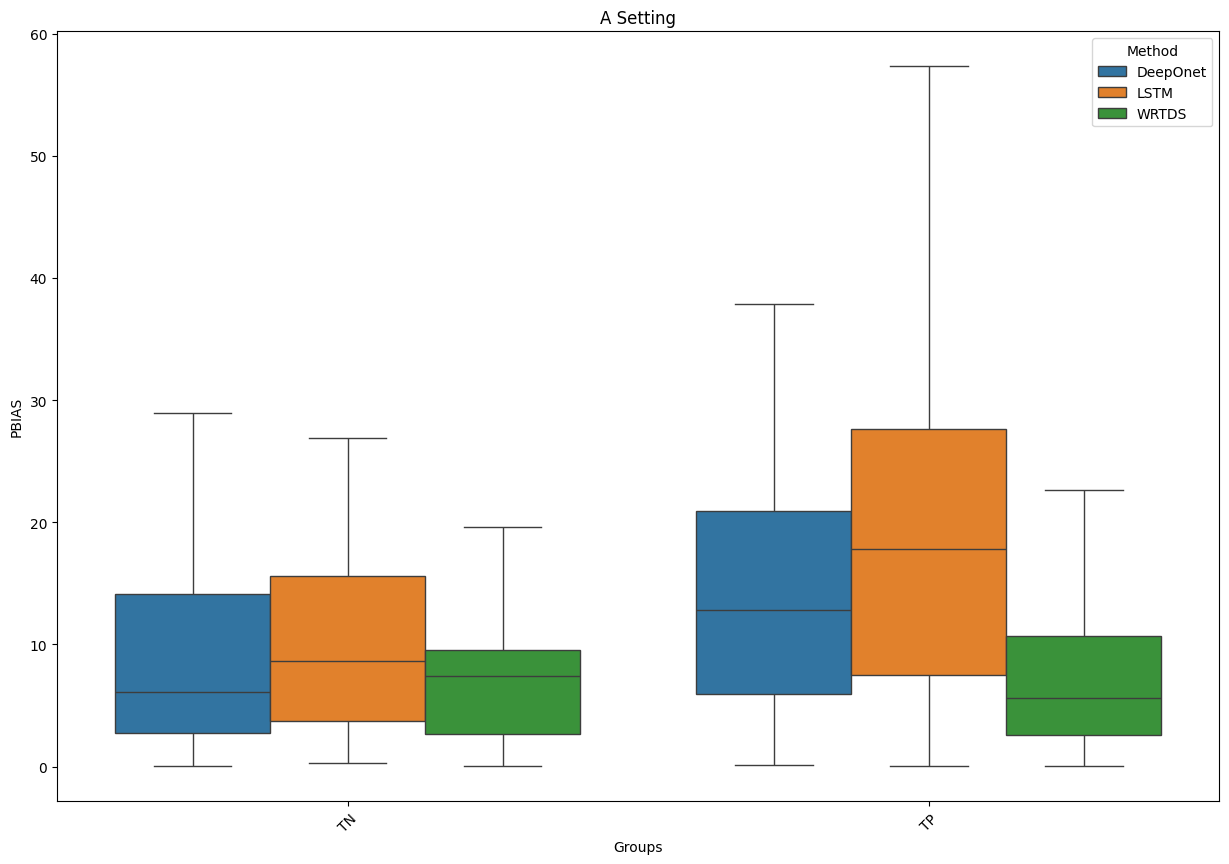

In [20]:
# KGE
df1 = pd.DataFrame(deeponet_a_kge, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_a_kge, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_a_kge, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('A Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('KGE')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/KGE_A.png', bbox_inches='tight')
plt.show()

# R2

df1 = pd.DataFrame(deeponet_a_r2, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_a_r2, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_a_r2, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('A Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/R2_A.png', bbox_inches='tight')
plt.show()

# PBIAS

df1 = pd.DataFrame(deeponet_a_pbias, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_a_pbias, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_a_pbias, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('A Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('PBIAS')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/PBIAS_A.png', bbox_inches='tight')
plt.show()



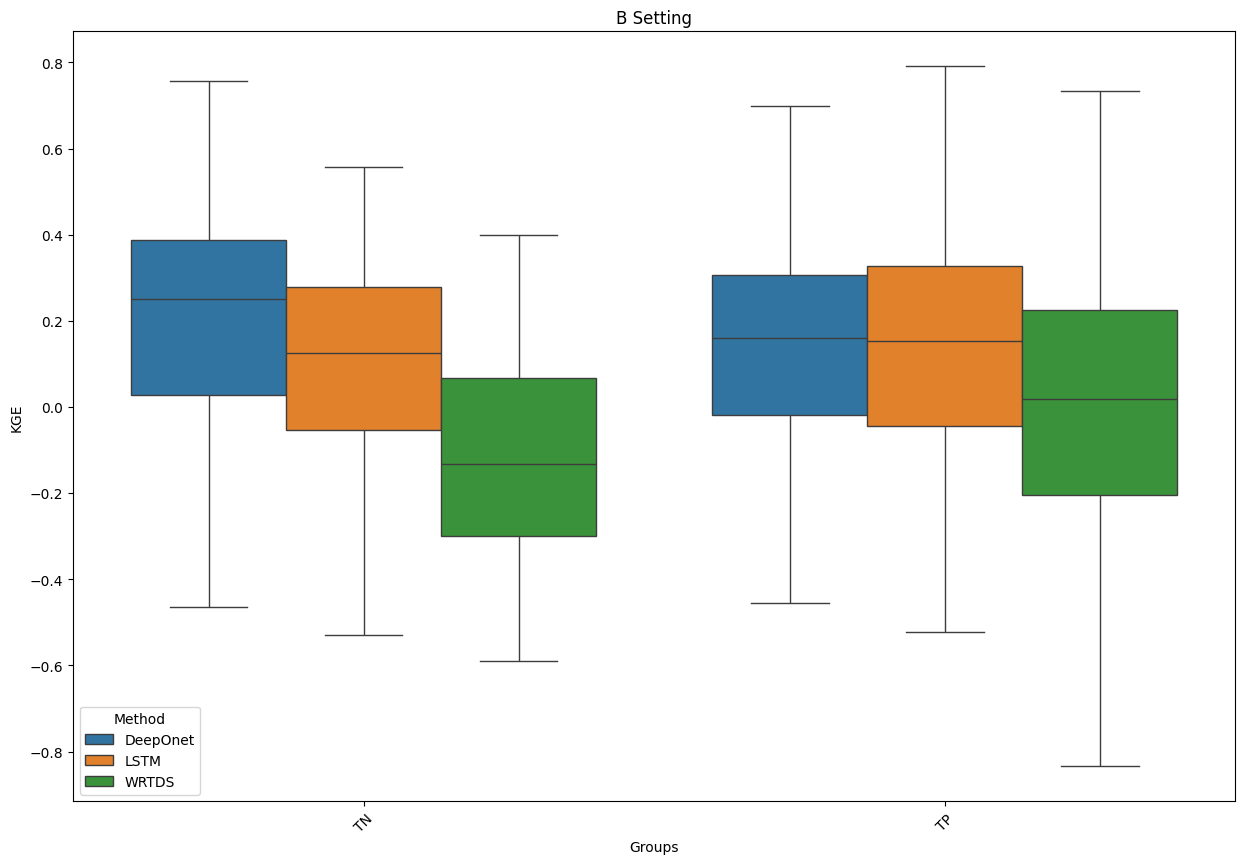

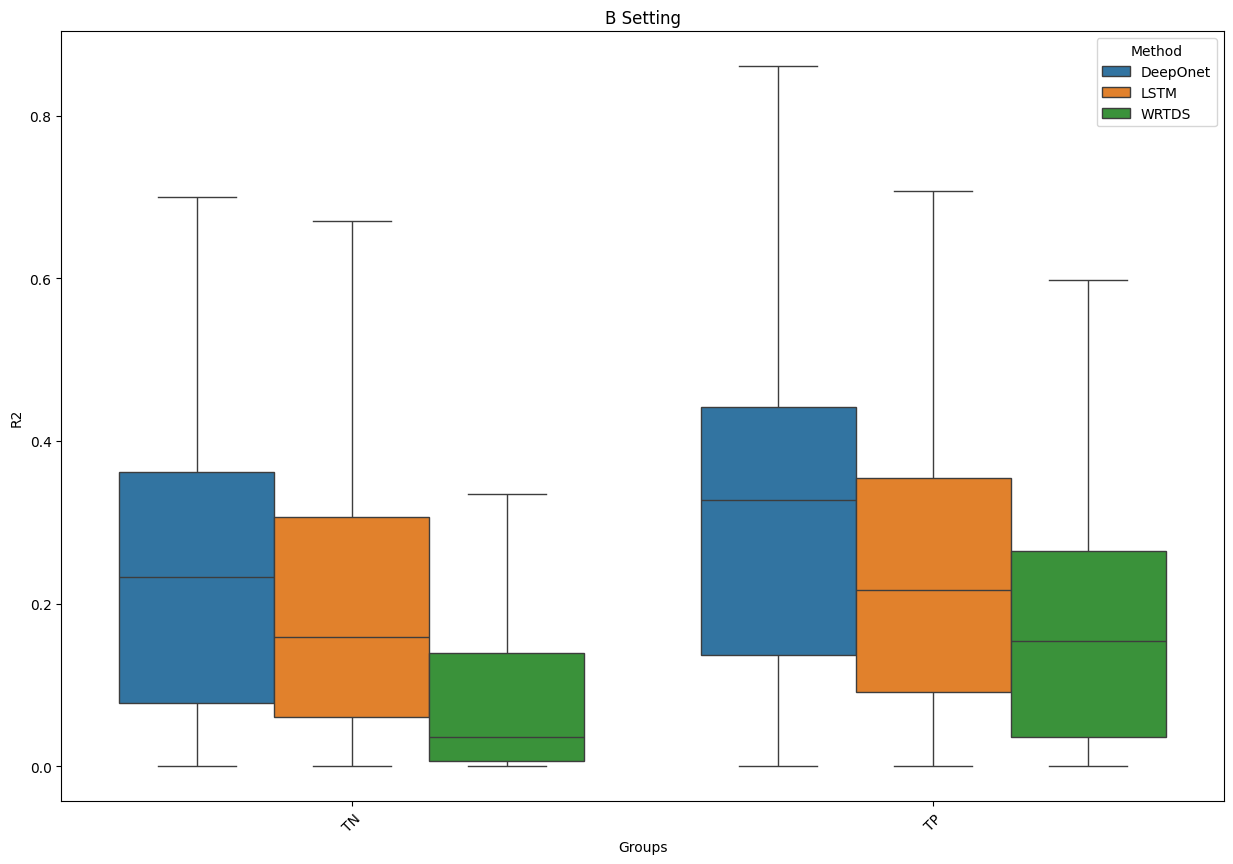

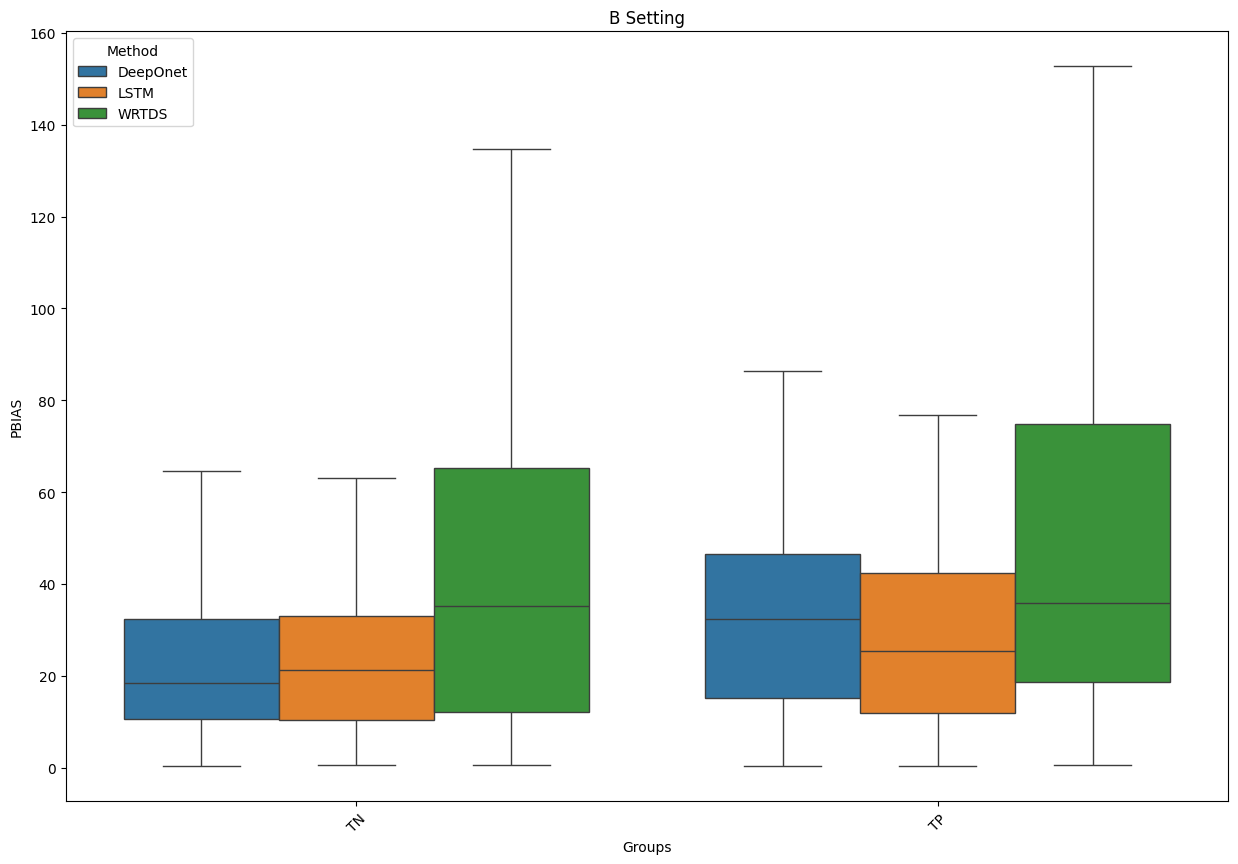

In [21]:
# KGE
df1 = pd.DataFrame(deeponet_b_kge, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_b_kge, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_b_kge, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('B Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('KGE')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/KGE_B.png', bbox_inches='tight')
plt.show()

# R2

df1 = pd.DataFrame(deeponet_b_r2, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_b_r2, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_b_r2, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('B Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/R2_B.png', bbox_inches='tight')
plt.show()

# PBIAS

df1 = pd.DataFrame(deeponet_b_pbias, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_b_pbias, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_b_pbias, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('B Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('PBIAS')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/PBIAS_B.png', bbox_inches='tight')
plt.show()



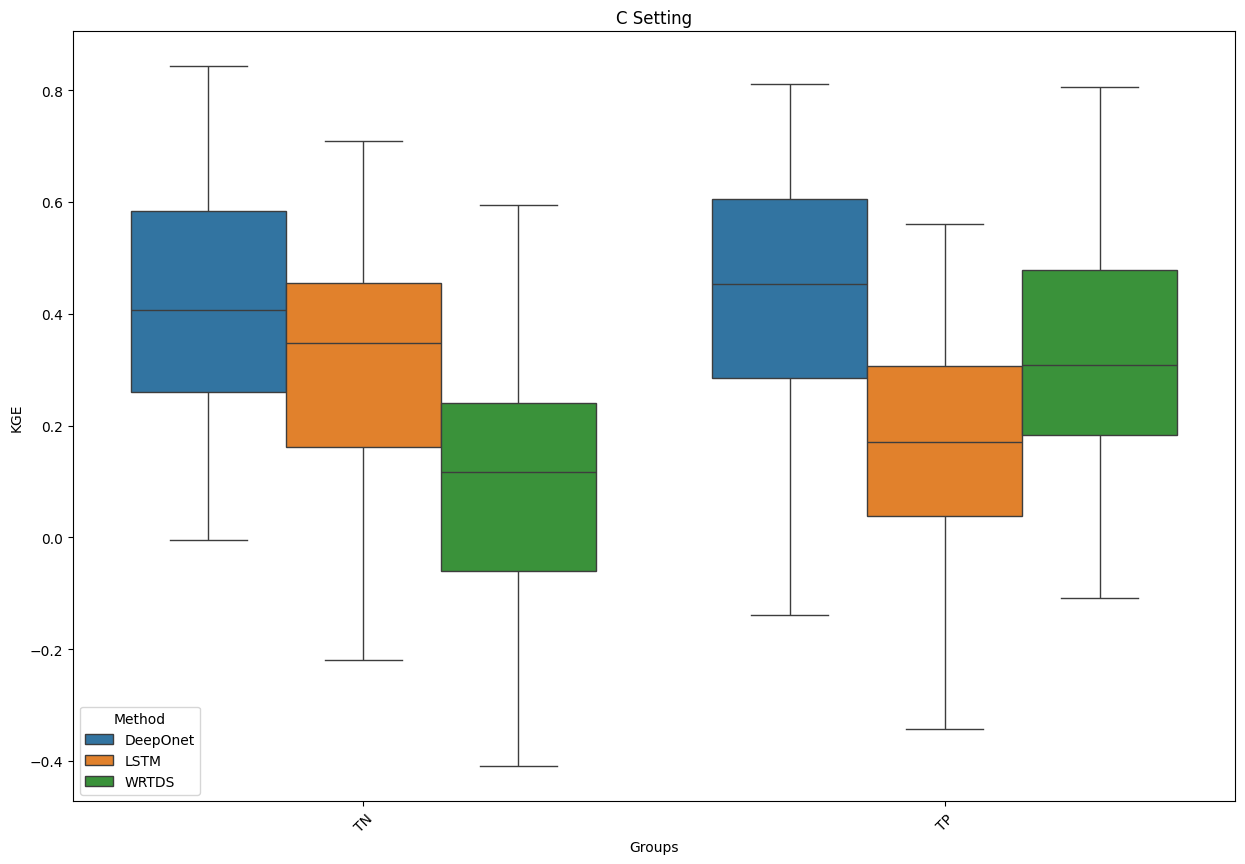

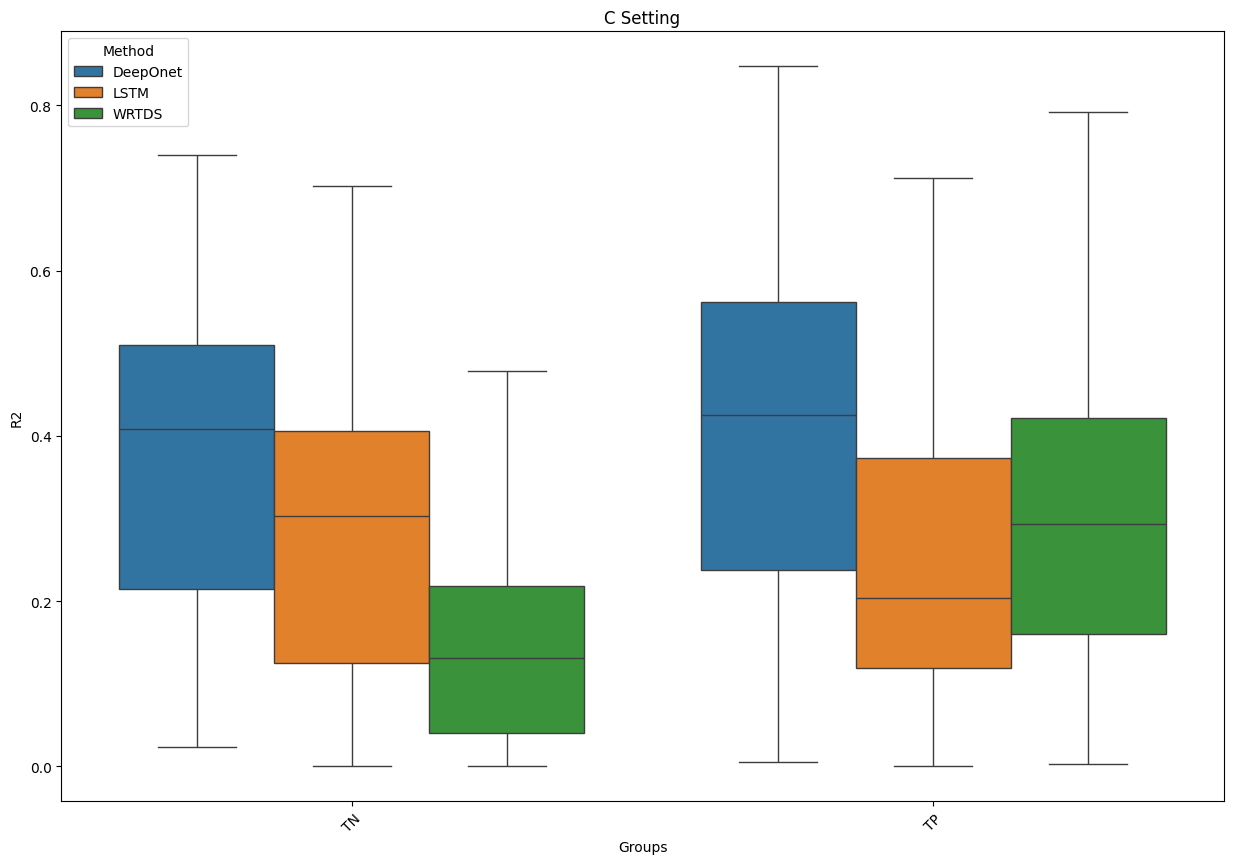

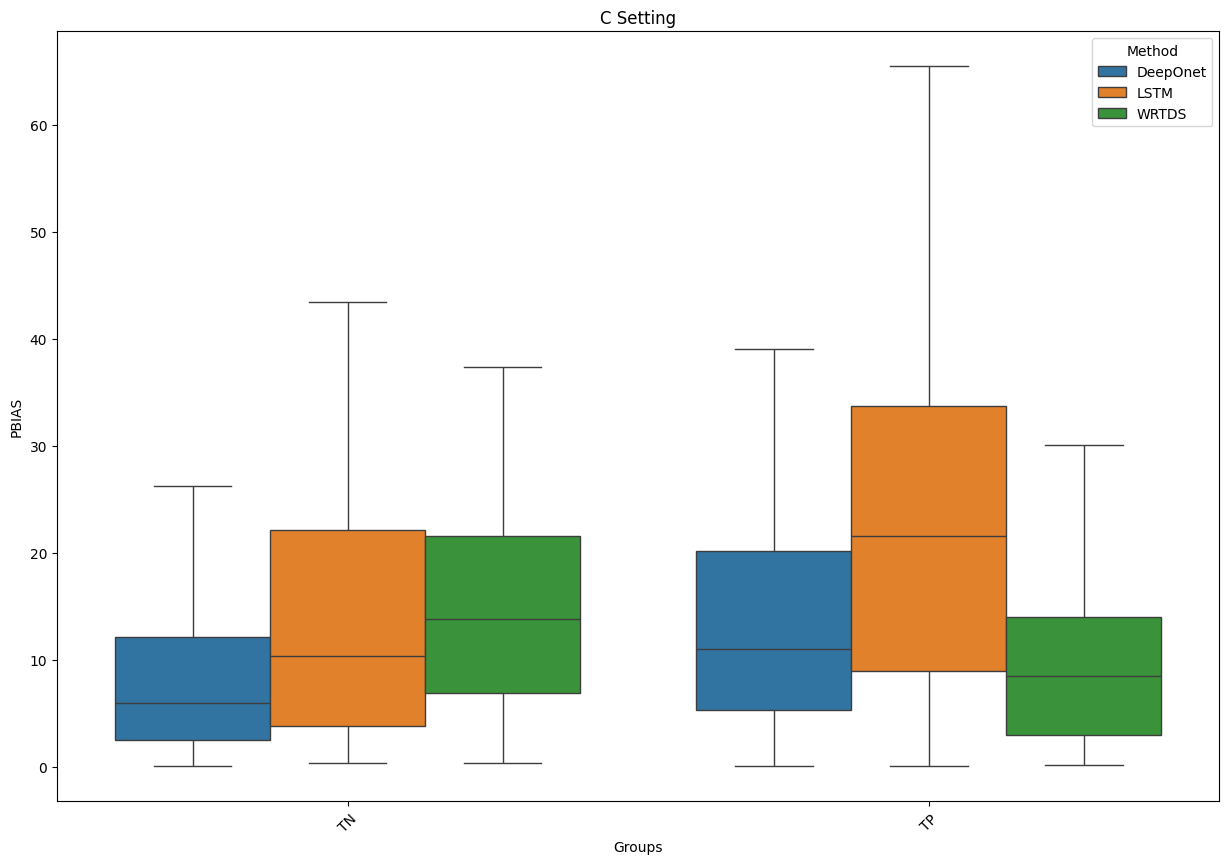

In [22]:
# KGE
df1 = pd.DataFrame(deeponet_c_kge, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_c_kge, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_c_kge, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('C Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('KGE')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/KGE_C.png', bbox_inches='tight')
plt.show()

# R2

df1 = pd.DataFrame(deeponet_c_r2, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_c_r2, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_c_r2, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('C Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('R2')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/R2_C.png', bbox_inches='tight')
plt.show()

# PBIAS

df1 = pd.DataFrame(deeponet_c_pbias, columns=['TN', 'TP'])
df1['Dataset'] = 'DeepOnet'
df2 = pd.DataFrame(lstm_c_pbias, columns=['TN', 'TP'])
df2['Dataset'] = 'LSTM'
df3 = pd.DataFrame(wrtds_c_pbias, columns=['TN', 'TP'])
df3['Dataset'] = 'WRTDS'

# 合并两个DataFrame
df_combined = pd.concat([df1, df2, df3])

# 将数据转为长格式
df_melted = pd.melt(df_combined, id_vars=['Dataset'], var_name='Group', value_name='Value')

# 绘制箱线图
plt.figure(figsize=(15, 10))
ax = sns.boxplot(x='Group', y='Value', hue='Dataset', data=df_melted, showfliers=False)
ax.set_title('C Setting')
ax.set_xlabel('Groups')
ax.set_ylabel('PBIAS')
plt.xticks(rotation=45)
plt.legend(title='Method')
plt.savefig('figures_tp_tn/PBIAS_C.png', bbox_inches='tight')
plt.show()

